In [6]:
import numpy as np
import math

# Define the covariance matrix
covariance_matrix = np.array([[5.88, 3.73], [3.73, 5.88]])

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Determine the major and minor eigenvectors based on the eigenvalues
major_index = np.argmax(eigenvalues)
minor_index = 1 - major_index  # Assuming a 2x2 matrix

major_eigenvector = eigenvectors[:, major_index]
minor_eigenvector = eigenvectors[:, minor_index]

# Calculate the orientation angles of the major and minor axes
major_orientation = math.degrees(math.atan2(major_eigenvector[1], major_eigenvector[0]))
minor_orientation = math.degrees(math.atan2(minor_eigenvector[1], minor_eigenvector[0]))

# Print the orientation angles
print("Major Axis Orientation (degrees):", major_orientation)
print("Minor Axis Orientation (degrees):", minor_orientation)

Major Axis Orientation (degrees): 45.0
Minor Axis Orientation (degrees): 135.0


In [6]:
import numpy as np
import math

# Define a squared matrix A = np.array([[34.36, 0], [0, 10.77]]), A = np.array([[4, 3], [3, 7]])
#A = np.array([[78030, 50490], [50490, 78030]])
A = np.array([[8.94, -5.05], [-5.05, 8.94]])

# Obtain eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print(np.argmax(eigenvalues))
majorEigenvector = eigenvectors[:,np.argmax(eigenvalues)]
minorEigenvector = eigenvectors[:,np.argmin(eigenvalues)]
print("Major EV: ", majorEigenvector)
print("Minor EV: ", minorEigenvector)
orientationAngleMa = math.atan2(majorEigenvector[1],majorEigenvector[0])
orientationAngleMi = math.atan2(minorEigenvector[1],minorEigenvector[0])
print("Major Angle:",math.degrees(orientationAngleMa))
print("Minor Angle:",math.degrees(orientationAngleMi))

Eigenvalues:
[13.99  3.89]

Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
0
Major EV:  [ 0.70710678 -0.70710678]
Minor EV:  [0.70710678 0.70710678]
Major Angle: -45.0
Minor Angle: 45.0


Number of contour points: 20
Centroid (u,v): (9.00, 30.00)

Covariance Matrix:
[[8.94736842 5.05263158]
 [5.05263158 8.94736842]]

Eigenvalues (λ1, λ2): [14.          3.89473684]

Principal Axes Directions:
Major axis: [0.70710678 0.70710678] (λ = 14.00)
Minor axis: [-0.70710678  0.70710678] (λ = 3.89)
135.0

Principal Axes Angles:
Major axis angle: 45.00°
Minor axis angle: 135.00°
Note: Angles are measured from the positive u-axis (horizontal)
135.0


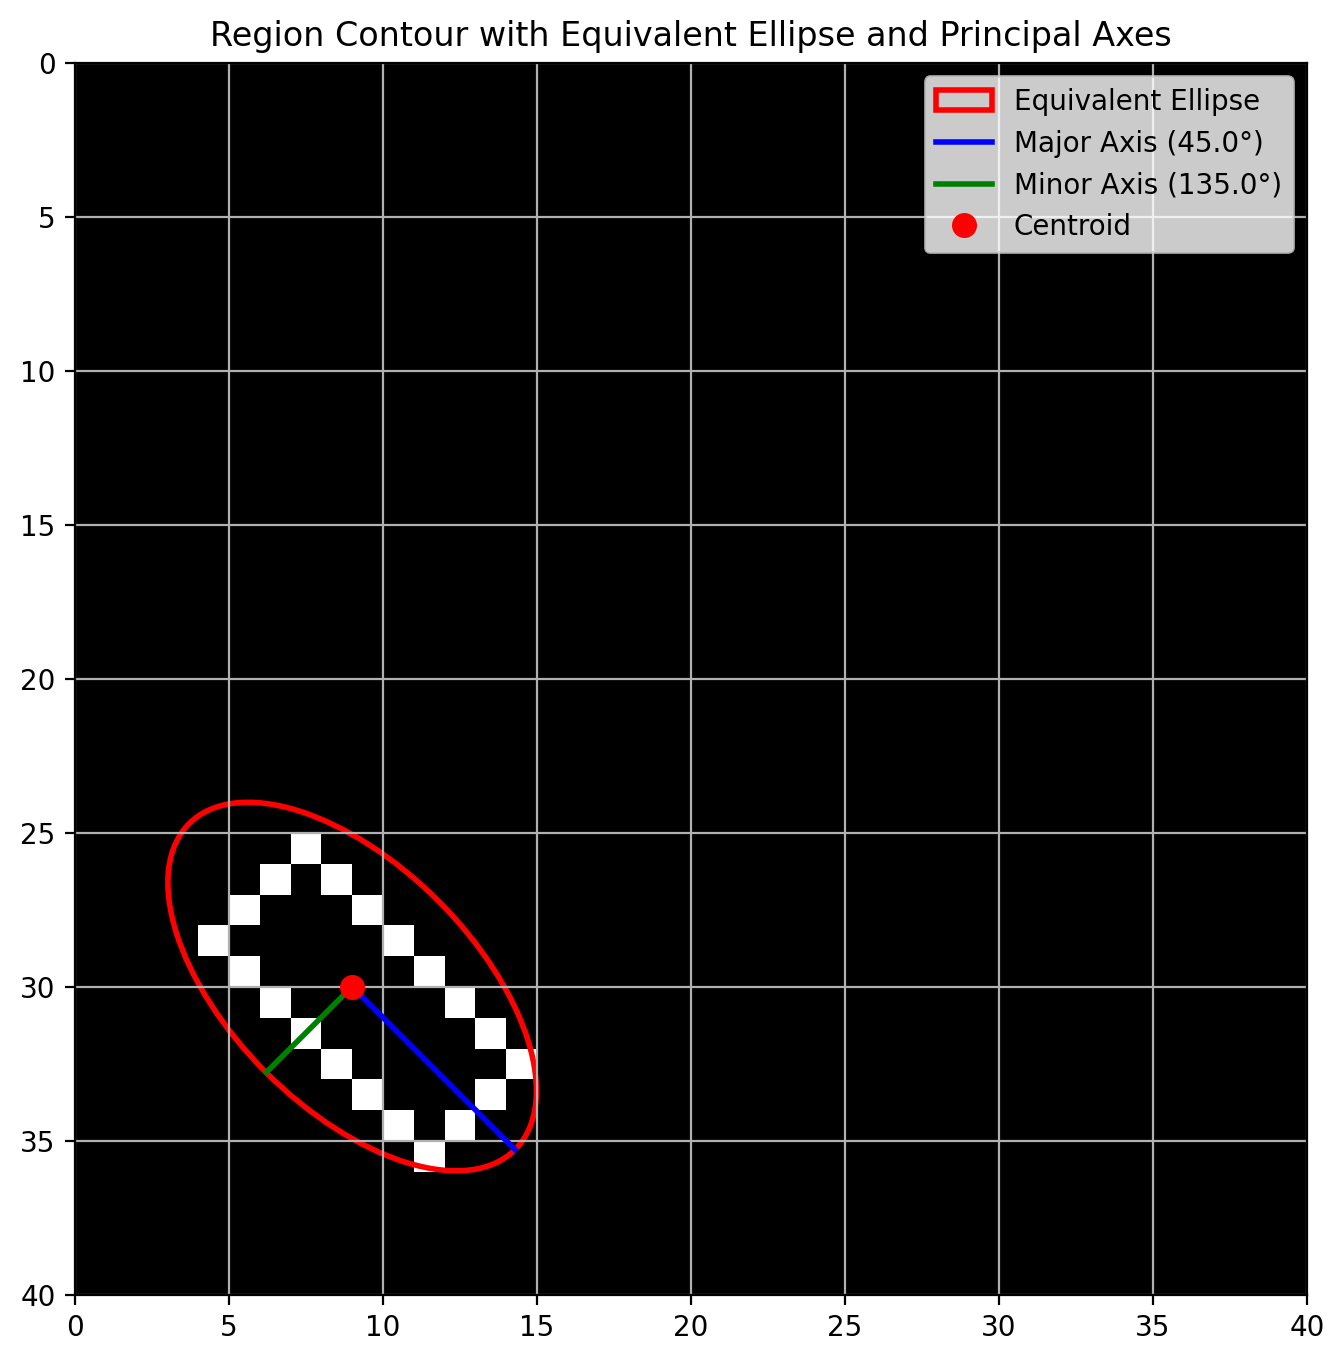

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.linalg import eigh
import os

def load_contour_data(file_path):
    """Load contour pixel coordinates from file."""
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'u' in df.columns and 'v' in df.columns:
            return df[['u', 'v']].values
        return df.iloc[:, :2].values
    else:
        return np.loadtxt(file_path)

def compute_region_properties(contour_points):
    """Calculate centroid, covariance matrix, and principal axes"""
    centroid = np.mean(contour_points, axis=0)
    centered = contour_points - centroid
    cov_matrix = np.cov(centered.T)
    eigenvalues, eigenvectors = eigh(cov_matrix)
    order = eigenvalues.argsort()[::-1]
    return centroid, cov_matrix, eigenvalues[order], eigenvectors[:, order]

def calculate_axis_angles(eigenvectors):
    """Calculate angles of major and minor axes in degrees"""
    major_angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    minor_angle = np.degrees(np.arctan2(eigenvectors[1, 1], eigenvectors[0, 1]))
    print(minor_angle)
    return major_angle, minor_angle

def plot_region_with_ellipse(contour_points, centroid, eigenvalues, eigenvectors, image_size=40):
    """Plot contour points, equivalent ellipse, centroid, and principal axes"""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create and display contour points
    image = np.zeros((image_size, image_size))
    for u, v in contour_points:
        u_int, v_int = int(round(u)), int(round(v))
        if 0 <= u_int < image_size and 0 <= v_int < image_size:
            image[v_int, u_int] = 1
    ax.imshow(image, cmap='gray', extent=[0, image_size, image_size, 0])
    
    # Calculate ellipse parameters
    width = 4 * np.sqrt(eigenvalues[0])
    height = 4 * np.sqrt(eigenvalues[1])
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    
    # Draw equivalent ellipse
    ellipse = Ellipse(xy=centroid, width=width, height=height, angle=angle,
                     edgecolor='r', fc='None', lw=2, label='Equivalent Ellipse')
    ax.add_patch(ellipse)
    
    # Calculate axis angles
    major_angle, minor_angle = calculate_axis_angles(eigenvectors)
    
    # Draw principal axes (scaled by eigenvalues)
    axis_length = 2 * np.sqrt(eigenvalues)
    
    # Major axis
    major_end = centroid + eigenvectors[:, 0] * axis_length[0]
    ax.plot([centroid[0], major_end[0]], [centroid[1], major_end[1]], 
            'b-', linewidth=2, label=f'Major Axis ({major_angle:.1f}°)')
    
    # Minor axis
    minor_end = centroid + eigenvectors[:, 1] * axis_length[1]
    ax.plot([centroid[0], minor_end[0]], [centroid[1], minor_end[1]], 
            'g-', linewidth=2, label=f'Minor Axis ({minor_angle:.1f}°)')
    
    # Plot centroid
    ax.plot(centroid[0], centroid[1], 'ro', markersize=8, label='Centroid')
    
    # Set plot properties
    ax.set_xlim(0, image_size)
    ax.set_ylim(image_size, 0)
    ax.set_aspect('equal')
    ax.set_title('Region Contour with Equivalent Ellipse and Principal Axes')
    ax.legend()
    ax.grid(True)
    plt.show()
    
    return major_angle, minor_angle

def analyze_contour(file_path):
    """Main analysis function for Jupyter environment"""
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return
    
    try:
        contour_points = load_contour_data(file_path)
        centroid, cov_matrix, eigenvalues, eigenvectors = compute_region_properties(contour_points)
        
        print(f"Number of contour points: {len(contour_points)}")
        print(f"Centroid (u,v): ({centroid[0]:.2f}, {centroid[1]:.2f})")
        print("\nCovariance Matrix:")
        print(cov_matrix)
        print("\nEigenvalues (λ1, λ2):", eigenvalues)
        print("\nPrincipal Axes Directions:")
        print(f"Major axis: {eigenvectors[:, 0]} (λ = {eigenvalues[0]:.2f})")
        print(f"Minor axis: {eigenvectors[:, 1]} (λ = {eigenvalues[1]:.2f})")
        
        # Calculate and print angles
        major_angle, minor_angle = calculate_axis_angles(eigenvectors)
        print("\nPrincipal Axes Angles:")
        print(f"Major axis angle: {major_angle:.2f}°")
        print(f"Minor axis angle: {minor_angle:.2f}°")
        print("Note: Angles are measured from the positive u-axis (horizontal)")
        
        # Plot results
        plot_region_with_ellipse(contour_points, centroid, eigenvalues, eigenvectors)
        
    except Exception as e:
        print(f"Error processing file: {e}")

# Example usage:
# analyze_contour("your_contour_data.csv")
analyze_contour("/home/user/Advanced-Robotics/Python-Code/Image-Processing/Image-Dataset/rfeBottomLeftRectangle.csv")

Finish


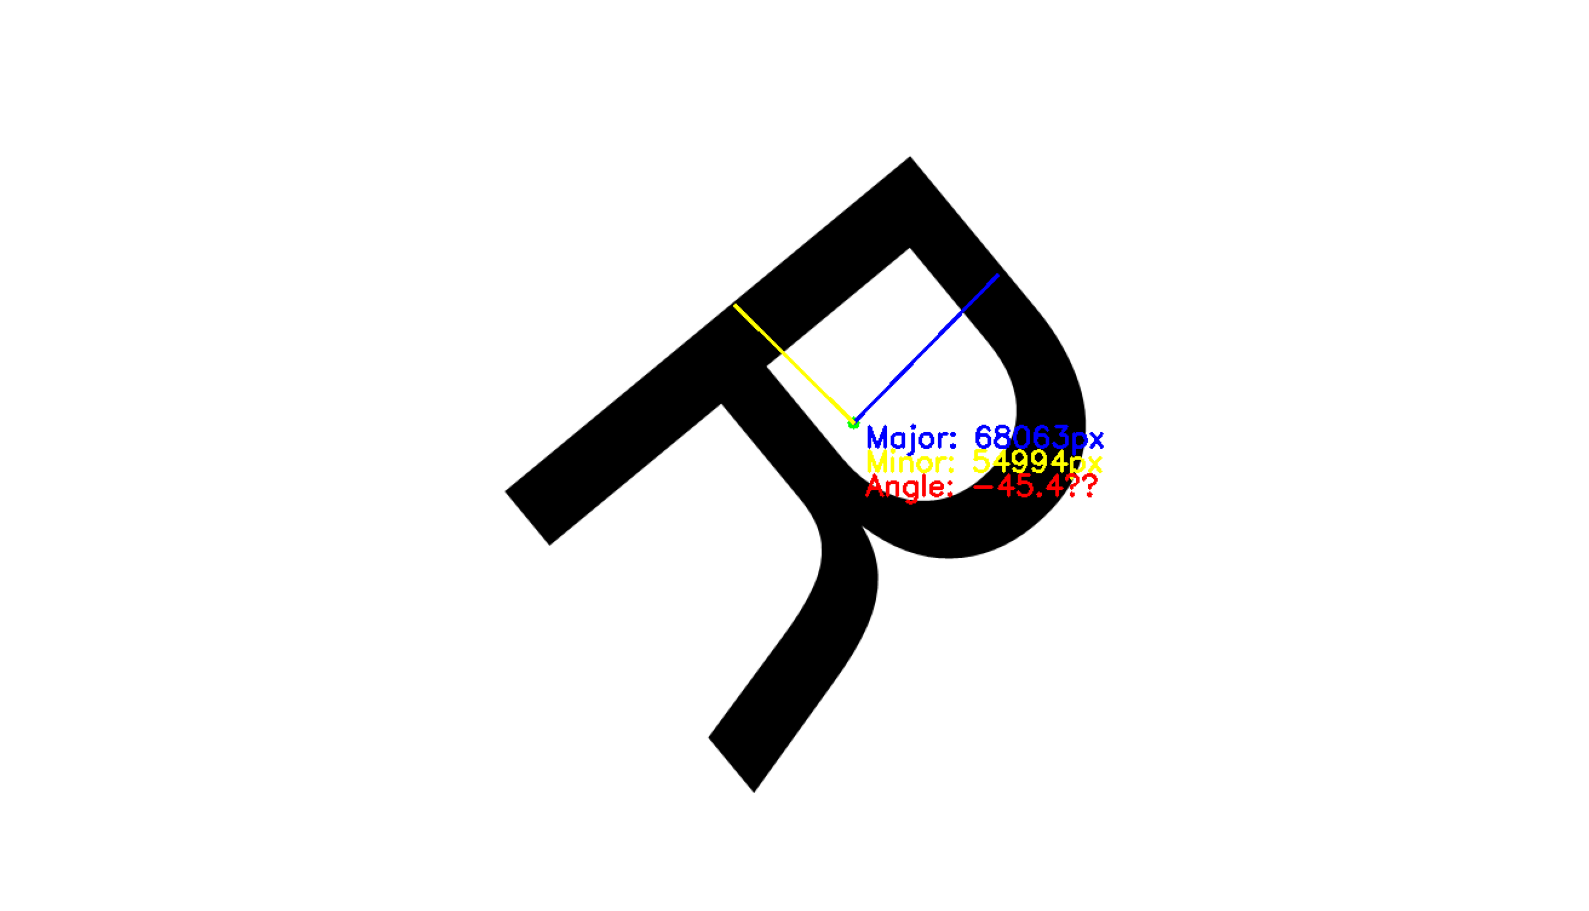

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plotRegionWithEllipse(imagePath):
    # Load the RGB image
    inputImage = cv2.imread(imagePath)
    if inputImage is None:
        print(f"Error: Could not load image at {imagePath}")
        return
    
    # Convert to grayscale and binarize
    grayImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
    _, binaryImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Visualization parameters
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 0.8
    lineThickness = 2
    colors = {
        'ellipse': (0, 0, 255),    # Red (BGR format)
        'majorAxis': (255, 0, 0),   # Blue
        'minorAxis': (0, 255, 255), # Yellow
        'centroid': (0, 255, 0)     # Green
    }

    for contour in contours:
        moments = cv2.moments(contour)
        if moments['m00'] > 0:
            # Compute centroid
            centroidX = int(moments['m10'] / moments['m00'])
            centroidY = int(moments['m01'] / moments['m00'])
            centroid = (centroidX, centroidY)
            
            # Compute central moments and inertia matrix
            u20 = moments['m20'] - (moments['m10']**2)/moments['m00']
            u02 = moments['m02'] - (moments['m01']**2)/moments['m00']
            u11 = moments['m11'] - (moments['m10']*moments['m01'])/moments['m00']
            inertiaMatrix = np.array([[u20, u11], [u11, u02]])

            # Compute eigenvalues and eigenvectors
            eigenValues, eigenVectors = np.linalg.eig(inertiaMatrix)
            if eigenValues[0] < eigenValues[1]:
                eigenValues = eigenValues[::-1]
                eigenVectors = eigenVectors[:, ::-1]
            
            # Compute ellipse parameters
            majorAxisLength = int(2 * np.sqrt(eigenValues[0]))
            minorAxisLength = int(2 * np.sqrt(eigenValues[1]))
            ellipseAngle = np.degrees(np.arctan2(eigenVectors[1,0], eigenVectors[0,0]))
               
            # Draw centroid
            cv2.circle(inputImage, centroid, 5, colors['centroid'], -1)
            
            # Draw axes with scaling for better visibility
            axisScale = 0.005
            majorAxisEnd = (
                int(centroidX + axisScale * eigenVectors[0,0] * majorAxisLength/2),
                int(centroidY + axisScale * eigenVectors[1,0] * majorAxisLength/2)
            )
            minorAxisEnd = (
                int(centroidX + axisScale * eigenVectors[0,1] * minorAxisLength/2),
                int(centroidY + axisScale * eigenVectors[1,1] * minorAxisLength/2)
            )
            
            cv2.line(inputImage, centroid, majorAxisEnd, colors['majorAxis'], lineThickness)
            cv2.line(inputImage, centroid, minorAxisEnd, colors['minorAxis'], lineThickness)
            
            # Add text labels
            textOffsetY = 20
            cv2.putText(inputImage, f"Major: {majorAxisLength}px", 
                        (centroidX + 10, centroidY + textOffsetY), 
                        fontType, fontSize, colors['majorAxis'], lineThickness)
            cv2.putText(inputImage, f"Minor: {minorAxisLength}px", 
                        (centroidX + 10, centroidY + textOffsetY*2), 
                        fontType, fontSize, colors['minorAxis'], lineThickness)
            cv2.putText(inputImage, f"Angle: {ellipseAngle:.1f}°", 
                        (centroidX + 10, centroidY + textOffsetY*3), 
                        fontType, fontSize, colors['ellipse'], lineThickness)

    # Display the result
    print('Finish')
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Call the function with the path to the image
picAddress = '/home/user/Advanced-Robotics/Python-Code/Image-Processing/Image-Dataset/alphaNumericR02.png'
plotRegionWithEllipse(picAddress)